In [10]:
import pandas as pd

seed = 0
extreme_case = pd.read_pickle(f'/home/wonseok/projects/2022_DATA_SYNTHESIS/young_age/data/processed/seed{seed}/4_results/extreme_case.pkl')
extreme_case

,model,type,age,f1_score,auroc,accuracy,auprc
0,DecisionTree,original,30,0.000000,0.500000,0.615385,0.384615
1,DecisionTree,epsilon_0,30,0.571429,0.700000,0.769231,0.630769
2,DecisionTree,epsilon_0.1,30,0.750000,0.800000,0.846154,0.753846
3,DecisionTree,epsilon_1,30,0.571429,0.700000,0.769231,0.630769
4,DecisionTree,epsilon_10,30,0.750000,0.800000,0.846154,0.753846
...,...,...,...,...,...,...,...
115,XGBoost,epsilon_1,50,0.577778,0.744513,0.924303,0.385809
116,XGBoost,epsilon_10,50,0.608696,0.764513,0.928287,0.417158
117,XGBoost,epsilon_100,50,0.565217,0.742301,0.920319,0.369714
118,XGBoost,epsilon_1000,50,0.577778,0.744513,0.924303,0.385809


In [48]:
from pathlib import Path
import pandas as pd
import yaml

config_path = Path().cwd().parents[1].joinpath('config/config.yaml')
project_path = Path().cwd().parents[1]
# project_path = Path('/home/wonseok/projects/2022_DATA_SYNTHESIS/young_age_privacy/')
figure_path = project_path.joinpath('figures')

In [52]:
df = pd.read_csv(project_path.joinpath(f'data/processed/4_results/extreme_case.csv'))

In [53]:
df

,model,type,age,f1_score,auroc,accuracy
0,DecisionTree,original,30,0.000000,0.500000,0.769231
1,DecisionTree,epsilon_0,30,0.000000,0.500000,0.769231
2,DecisionTree,epsilon_0.1,30,0.000000,0.400000,0.615385
3,DecisionTree,epsilon_1,30,0.000000,0.400000,0.615385
4,DecisionTree,epsilon_10,30,0.333333,0.566667,0.692308
...,...,...,...,...,...,...
115,XGBoost,epsilon_1,50,0.470588,0.695440,0.928287
116,XGBoost,epsilon_10,50,0.437500,0.671279,0.928287
117,XGBoost,epsilon_100,50,0.484848,0.697595,0.932271
118,XGBoost,epsilon_1000,50,0.400000,0.647119,0.928287


In [54]:
d1 = df[df.type == 'original'].copy()
d2 = df[df.type != 'original'].copy()

여기서부터 진행할 것

In [88]:
with open(config_path) as f : 
    config = yaml.load(f, yaml.SafeLoader)

extreme_case_list = []
for age in config['age_cut'] : 
    df = pd.read_csv(project_path.joinpath(f'data/processed/4_results/training_strategy_{age}.csv'))
    df['age_cut'] = age
    extreme_case_list.append(df)

extreme_case = pd.concat(extreme_case_list)
extreme_case

,model,type,epsilon,auroc,f1_score,accuracy,auprc,age_cut
0,DecisionTree,trtr,0.0,0.500000,0.000000,0.769231,0.230769,30
1,RandomForest,trtr,0.0,0.616667,0.400000,0.769231,0.320513,30
2,XGBoost,trtr,0.0,0.666667,0.500000,0.846154,0.487179,30
3,DecisionTree,tstr,0.0,0.500000,0.000000,0.769231,0.230769,30
4,RandomForest,tstr,0.0,0.500000,0.000000,0.769231,0.230769,30
...,...,...,...,...,...,...,...,...
61,RandomForest,trts,10000.0,0.778698,0.628571,0.948207,0.429899,50
62,XGBoost,trts,10000.0,0.767922,0.550000,0.928287,0.335131,50
63,DecisionTree,tsts,10000.0,0.598798,0.307692,0.928287,0.180062,50
64,RandomForest,tsts,10000.0,0.836093,0.583333,0.920319,0.375637,50


In [89]:
d1 = extreme_case[extreme_case.type == 'trtr'].copy()
d2 = extreme_case[extreme_case.type == 'tstr'].copy()

d1 = d1.drop(columns = 'type')
d2 = d2.drop(columns = 'type')

d1['epsilon'] = 'original'
d2['epsilon'] = d2['epsilon']
d2['epsilon'] = d2['epsilon'].apply(lambda x : "epsilon_"+str(x))

d1 = d1.rename(columns = {'epsilon':'type'})
d2 = d2.rename(columns = {'epsilon':'type'})

d1

,model,type,auroc,f1_score,accuracy,auprc,age_cut
0,DecisionTree,original,0.500000,0.000000,0.769231,0.230769,30
1,RandomForest,original,0.616667,0.400000,0.769231,0.320513,30
2,XGBoost,original,0.666667,0.500000,0.846154,0.487179,30
0,DecisionTree,original,0.611111,0.333333,0.900000,0.200000,35
1,RandomForest,original,0.500000,0.000000,0.900000,0.100000,35
2,XGBoost,original,0.611111,0.333333,0.900000,0.200000,35
0,DecisionTree,original,0.517532,0.125000,0.839080,0.120115,40
1,RandomForest,original,0.637013,0.400000,0.896552,0.260460,40
2,XGBoost,original,0.543506,0.166667,0.885057,0.153448,40
0,DecisionTree,original,0.682639,0.461538,0.911950,0.274786,45


In [90]:
extreme_case = pd.concat([d1,d2])

In [91]:
extreme_case

,model,type,auroc,f1_score,accuracy,auprc,age_cut
0,DecisionTree,original,0.500000,0.000000,0.769231,0.230769,30
1,RandomForest,original,0.616667,0.400000,0.769231,0.320513,30
2,XGBoost,original,0.666667,0.500000,0.846154,0.487179,30
0,DecisionTree,original,0.611111,0.333333,0.900000,0.200000,35
1,RandomForest,original,0.500000,0.000000,0.900000,0.100000,35
...,...,...,...,...,...,...,...
49,RandomForest,epsilon_1000.0,0.816697,0.491228,0.884462,0.291388,50
50,XGBoost,epsilon_1000.0,0.803766,0.444444,0.860558,0.254370,50
57,DecisionTree,epsilon_10000.0,0.845622,0.457143,0.848606,0.276142,50
58,RandomForest,epsilon_10000.0,0.836093,0.583333,0.920319,0.375637,50


In [92]:
extreme_case = extreme_case.rename(columns = {'age_cut': 'age'})
extreme_case = extreme_case[['model', 'type', 'age', 'f1_score', 'auroc', 'accuracy']]

extreme_case

,model,type,age,f1_score,auroc,accuracy
0,DecisionTree,original,30,0.000000,0.500000,0.769231
1,RandomForest,original,30,0.400000,0.616667,0.769231
2,XGBoost,original,30,0.500000,0.666667,0.846154
0,DecisionTree,original,35,0.333333,0.611111,0.900000
1,RandomForest,original,35,0.000000,0.500000,0.900000
...,...,...,...,...,...,...
49,RandomForest,epsilon_1000.0,50,0.491228,0.816697,0.884462
50,XGBoost,epsilon_1000.0,50,0.444444,0.803766,0.860558
57,DecisionTree,epsilon_10000.0,50,0.457143,0.845622,0.848606
58,RandomForest,epsilon_10000.0,50,0.583333,0.836093,0.920319


In [93]:
cond1 = extreme_case['model']=='DecisionTree'
cond2 = extreme_case['type']=='original'
cond3 = extreme_case['type']=='epsilon_10000.0'
#extreme_case[cond1&cond3]


In [94]:
extreme_case

,model,type,age,f1_score,auroc,accuracy
0,DecisionTree,original,30,0.000000,0.500000,0.769231
1,RandomForest,original,30,0.400000,0.616667,0.769231
2,XGBoost,original,30,0.500000,0.666667,0.846154
0,DecisionTree,original,35,0.333333,0.611111,0.900000
1,RandomForest,original,35,0.000000,0.500000,0.900000
...,...,...,...,...,...,...
49,RandomForest,epsilon_1000.0,50,0.491228,0.816697,0.884462
50,XGBoost,epsilon_1000.0,50,0.444444,0.803766,0.860558
57,DecisionTree,epsilon_10000.0,50,0.457143,0.845622,0.848606
58,RandomForest,epsilon_10000.0,50,0.583333,0.836093,0.920319


In [95]:
extreme_case[cond1&cond3]

,model,type,age,f1_score,auroc,accuracy
57,DecisionTree,epsilon_10000.0,30,0.400000,0.616667,0.769231
57,DecisionTree,epsilon_10000.0,35,0.222222,0.569444,0.825000
57,DecisionTree,epsilon_10000.0,40,0.500000,0.748052,0.862069
57,DecisionTree,epsilon_10000.0,45,0.461538,0.747917,0.867925
57,DecisionTree,epsilon_10000.0,50,0.457143,0.845622,0.848606


In [ ]:

# dt_org_ex = list(extreme_case[cond1&cond2]['auroc'])[::-1]
# dt_syn_ex = list(extreme_case[cond1&cond3]['auroc'])[::-1]

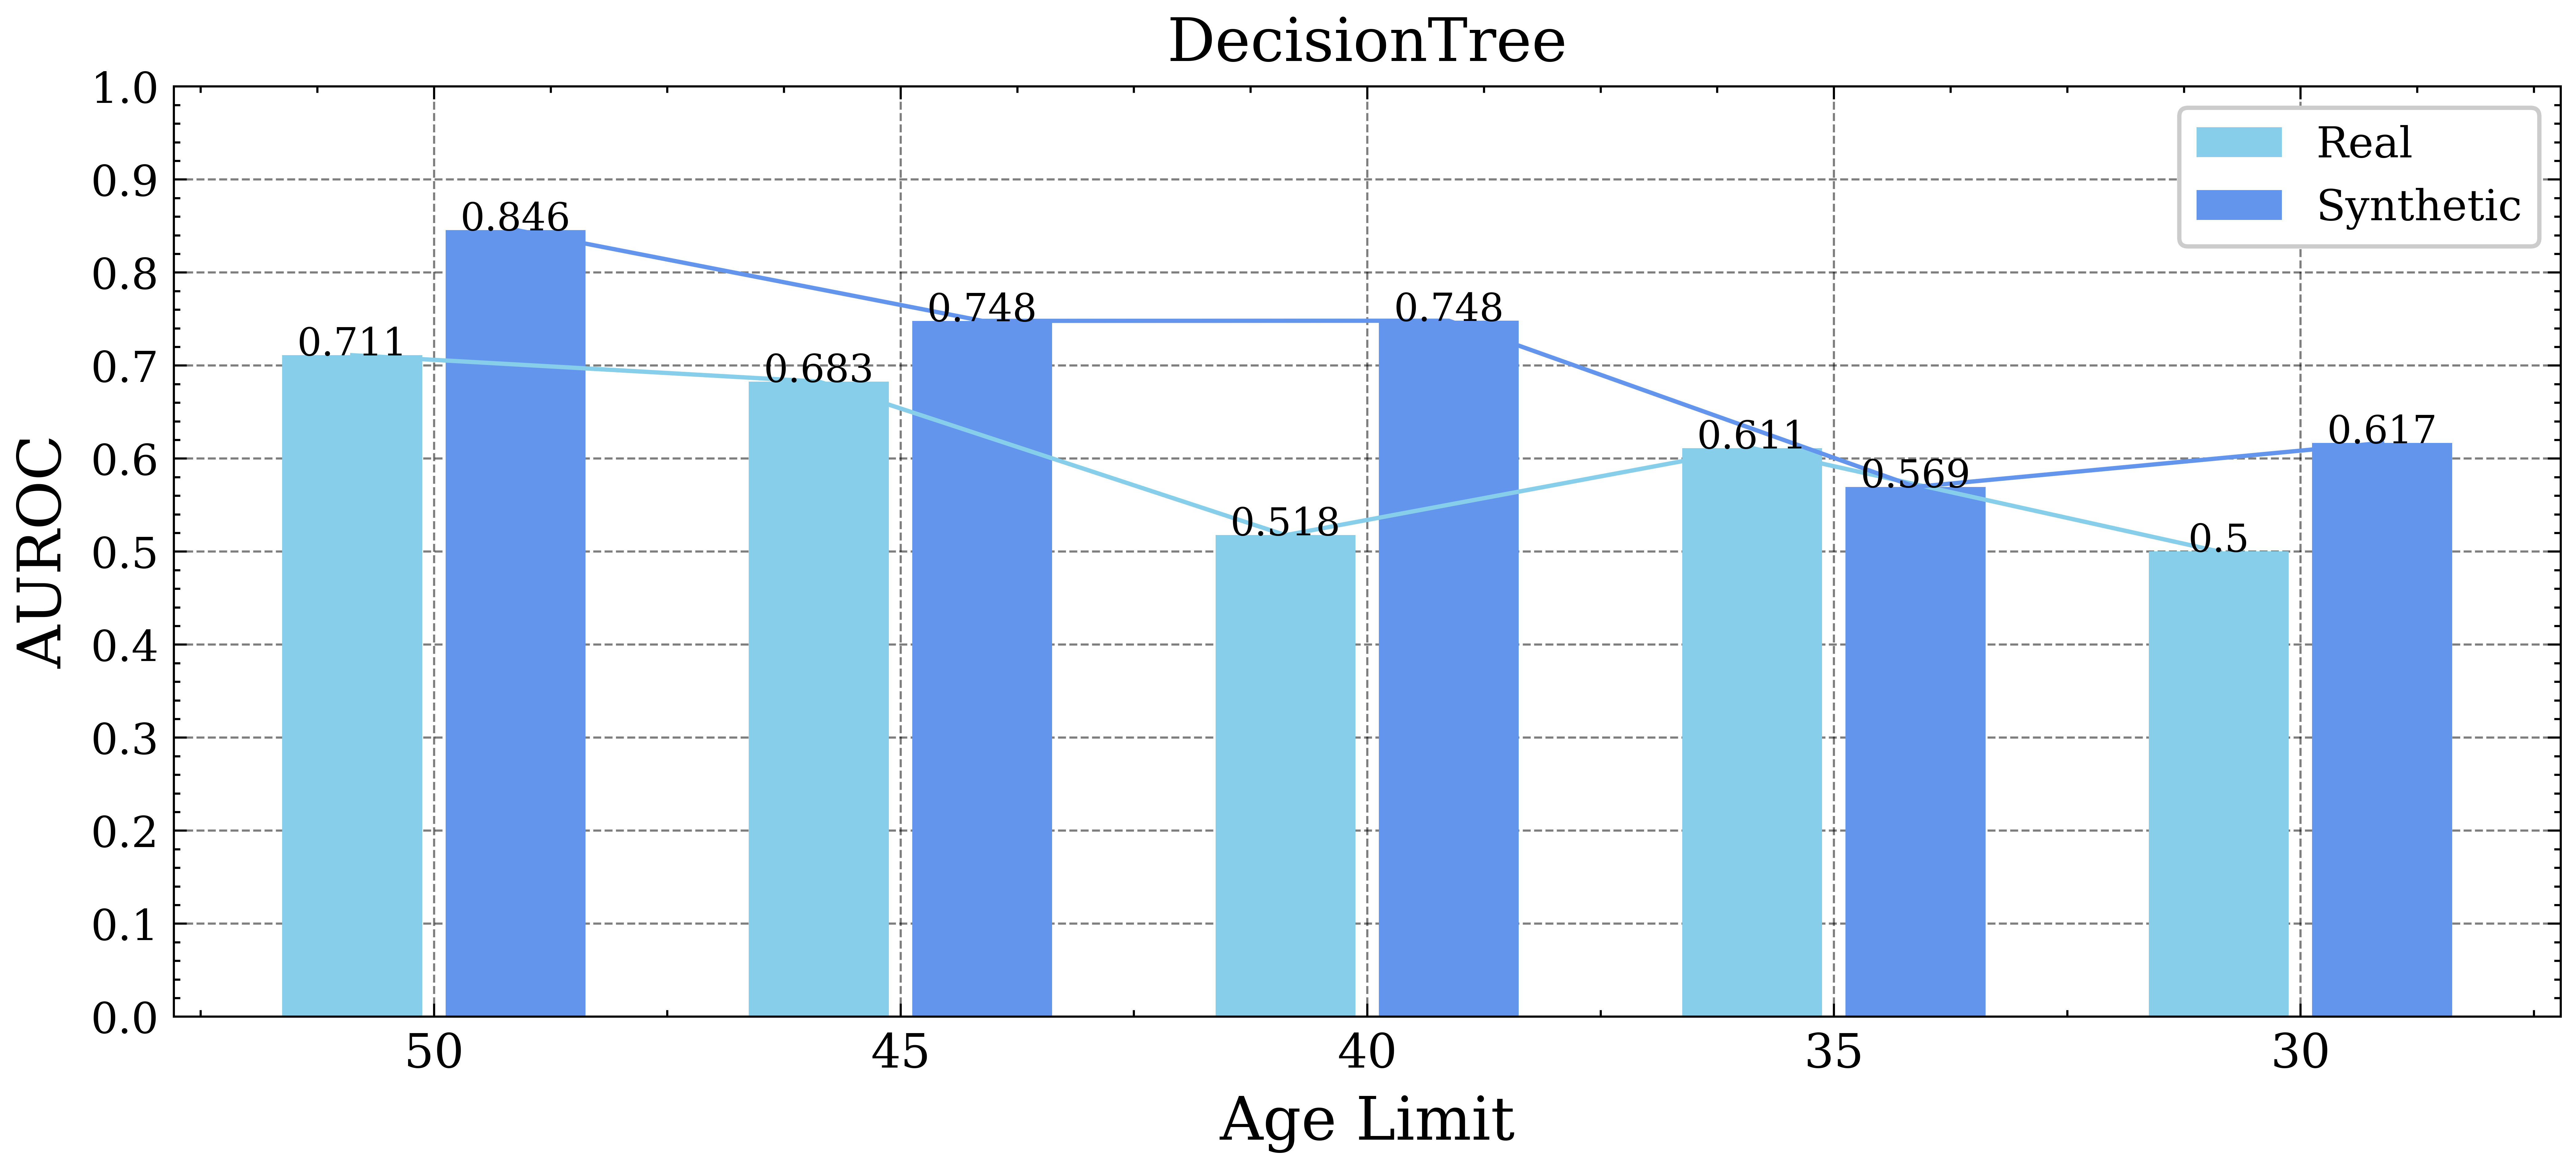

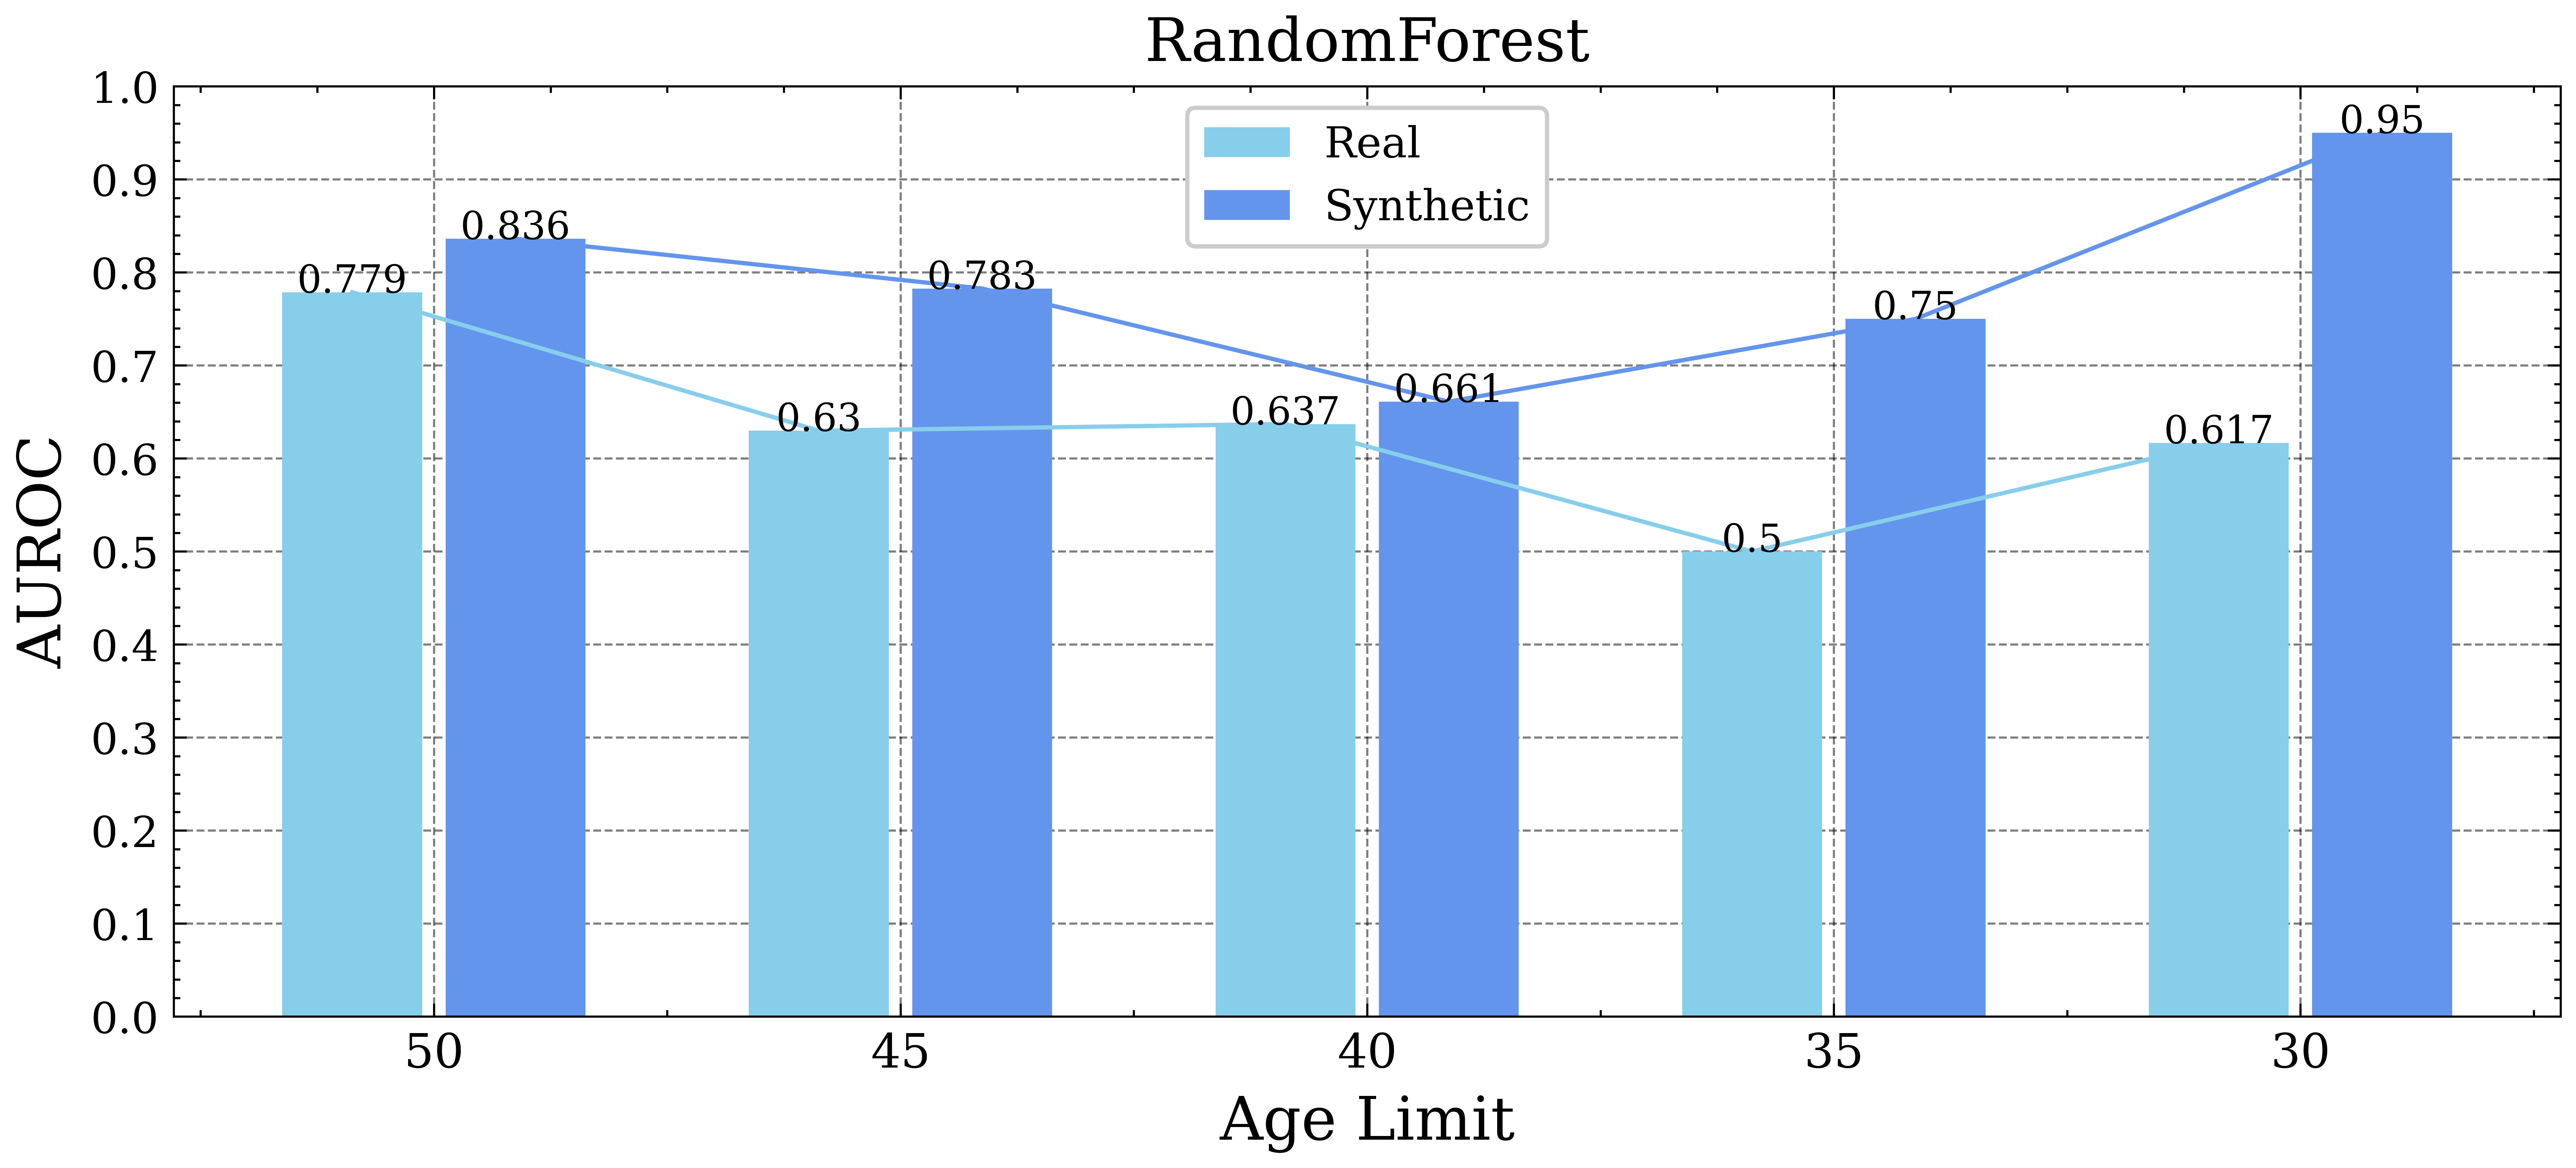

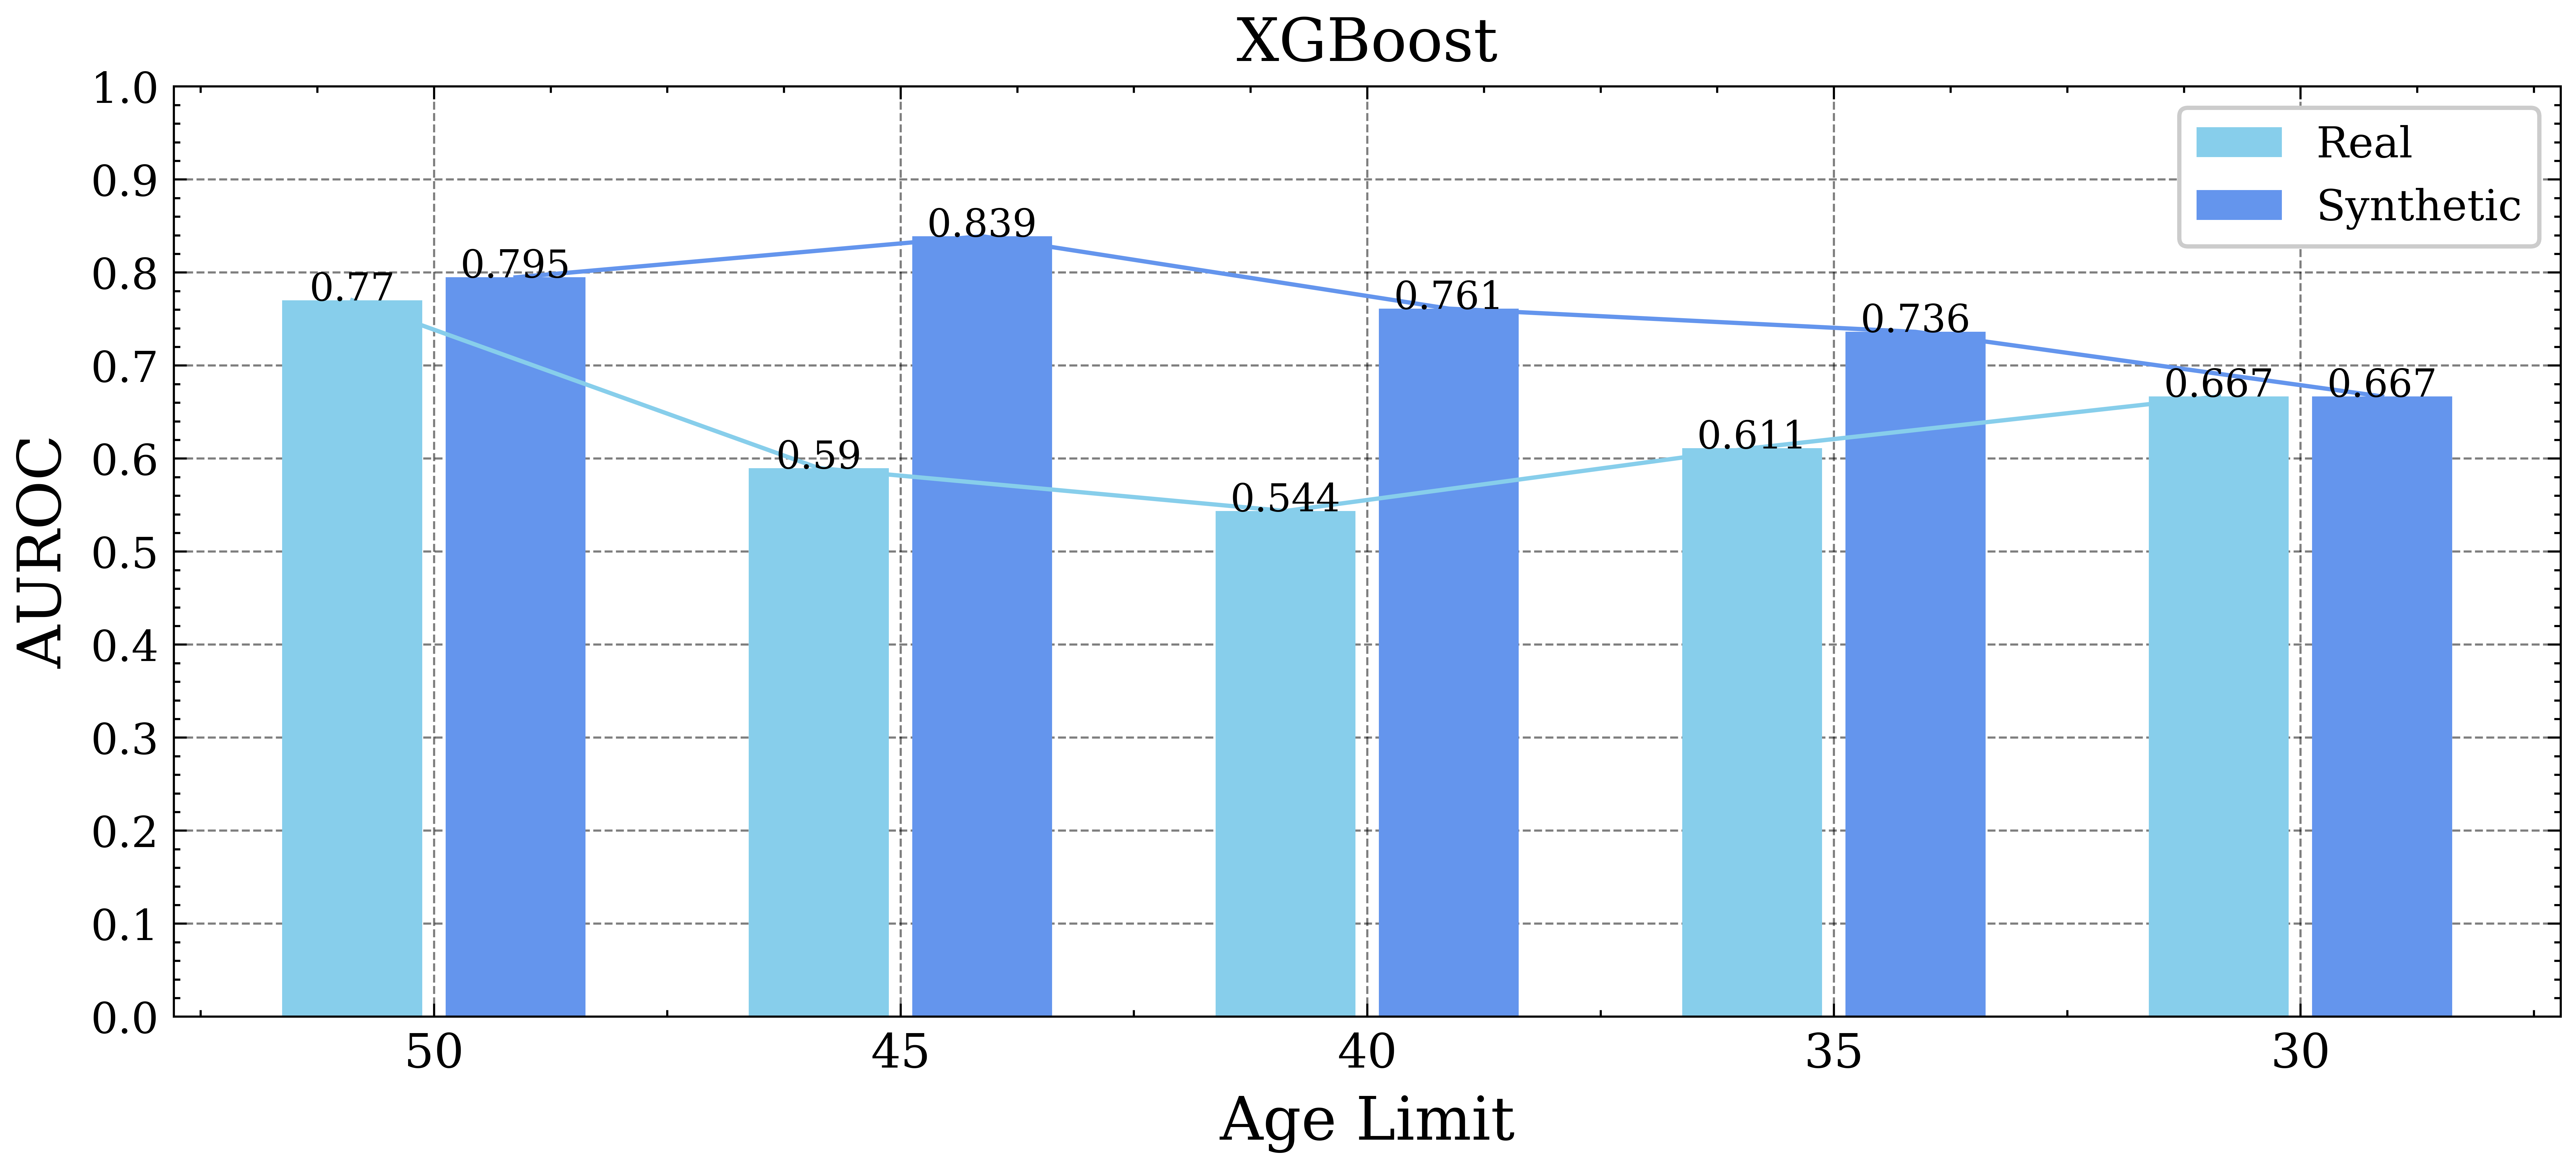

In [99]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

cond2 = extreme_case['type']=='original'
cond3 = extreme_case['type']=='epsilon_10000.0'

# plt.subplot

for i, model_name in enumerate(['DecisionTree','RandomForest','XGBoost']):
    plt.style.use(['science','grid','no-latex','vibrant'])

    plt.figure(figsize=(10,4),dpi=1000)
    cond1 = extreme_case['model']== model_name
#    plt.subplot(1,3,i+1)
    X1=[1,3,5,7,9]
    data1 = list(extreme_case[cond1&cond2]['auroc'])[::-1]
    plt.bar(X1, data1,width=0.6,label='Real', color='skyblue')
    plt.plot(X1,data1, color='skyblue')
    for i, v in enumerate(data1):
        plt.text(X1[i], v, str(round(v,3)), ha='center', fontsize=9)


    X2=[1+0.7,3+0.7,5+0.7,7+0.7, 9+0.7]
    data2 = list(extreme_case[cond1&cond3]['auroc'])[::-1]
    plt.bar(X2, data2, width=0.6,label='Synthetic',color = 'cornflowerblue')
    plt.plot(X2,data2,color = 'cornflowerblue')
    for i, v in enumerate(data2):
        plt.text(X2[i], v, str(round(v,3)), ha='center', fontsize=9)

    plt.legend()
    ticklabel=['50','45','40','35','30']
    plt.xticks([1+0.35,3+0.35,5+0.35,7+0.35,9+0.35],ticklabel, fontsize=11)

    plt.xlabel('Age Limit',fontsize=14)
    plt.ylabel('AUROC',fontsize=14)
    plt.ylim(0,1)

    plt.yticks(np.arange(0,1.1,0.1))

    plt.title(model_name, fontsize=14)
    plt.savefig(figure_path.joinpath(f'extreme_case_{model_name}.png'), dpi = 500)
plt.show()